# 1- Importando a base de dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
query = "SELECT * FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` WHERE date BETWEEN'20170101' AND '20170131' "

In [3]:
query

"SELECT * FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` WHERE date BETWEEN'20170101' AND '20170131' "

In [4]:
df = pd.read_gbq(query=query, project_id='axial-entity-309700', dialect='standard', dtype={'visitId':object})

Requesting query... ok.
Job ID: 0b027e57-fe48-4ea0-b512-bc649a59dee0
Query running...
  Elapsed 7.74 s. Waiting...
  Elapsed 8.74 s. Waiting...
  Elapsed 9.75 s. Waiting...
  Elapsed 10.94 s. Waiting...
  Elapsed 12.17 s. Waiting...
  Elapsed 13.52 s. Waiting...
  Elapsed 14.53 s. Waiting...
  Elapsed 15.53 s. Waiting...
  Elapsed 16.54 s. Waiting...
  Elapsed 17.55 s. Waiting...
  Elapsed 18.55 s. Waiting...
  Elapsed 19.56 s. Waiting...
Query done.
Processed: 5.4 GB Billed: 5.4 GB
Standard price: $0.03 USD

Retrieving results...
Got 64694 rows.

Total time taken 636.83 s.
Finished at 2021-04-06 23:57:17.


In [5]:
df.shape

(64694, 16)

In [6]:
df.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,None,1,1483293536,1483293536,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Northern America', 'longitud...","[{'value': 'North America', 'index': 4}]","[{'refund': None, 'appInfo': {'appId': None, '...",8579447395603063581,None,None,Organic Search,Not Socially Engaged
1,None,2,1483274069,1483274069,20170101,"{'sessionQualityDim': None, 'newVisits': None,...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Southern Asia', 'longitude':...","[{'value': 'APAC', 'index': 4}]","[{'refund': None, 'appInfo': {'appId': None, '...",5817689849705783870,None,None,Organic Search,Not Socially Engaged
2,None,1,1483278401,1483278401,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Eastern Europe', 'longitude'...",[],"[{'refund': None, 'appInfo': {'appId': None, '...",8160804435292640144,None,None,Organic Search,Not Socially Engaged
3,None,1,1483304893,1483304893,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Northern Europe', 'longitude...",[],"[{'refund': None, 'appInfo': {'appId': None, '...",6209879019453902505,None,None,Organic Search,Not Socially Engaged
4,None,1,1483298301,1483298301,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Western Europe', 'longitude'...",[],"[{'refund': None, 'appInfo': {'appId': None, '...",4656501438309298839,None,None,Organic Search,Not Socially Engaged


# 2- Tratamento de dados

- Criando variáveis com a coluna hits.

In [7]:
produtos_sessao = []
precos_sessao = []

for linha in df.hits :
  produtos_hit = []
  precos_hit = []
  for hit in linha:
    for produto in hit['product'] :
      produtos_hit.append(produto['productSKU'])
      precos_hit.append(produto['productPrice'])
  produtos_sessao.append(produtos_hit)
  precos_sessao.append(sum(precos_hit))

In [8]:
len(precos_sessao)

64694

In [9]:
len(produtos_sessao)

64694

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

In [11]:
mlb = MultiLabelBinarizer()

In [12]:
s = pd.Series(produtos_sessao)

In [13]:
produtos = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=df.index)
produtos.head()

,10 52048,10 52147,10 52211,10 52213,10 52223,10 52225,10 52230,10 52231,10 52232,10 52233,...,GGOEYFKQ020699,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
produtos.shape

(64694, 1109)

In [15]:
df = df.join(produtos)
df['preco'] = precos_sessao

In [16]:
df.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,...,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599,preco
0,None,1,1483293536,1483293536,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Northern America', 'longitud...","[{'value': 'North America', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0
1,None,2,1483274069,1483274069,20170101,"{'sessionQualityDim': None, 'newVisits': None,...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Southern Asia', 'longitude':...","[{'value': 'APAC', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0
2,None,1,1483278401,1483278401,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Eastern Europe', 'longitude'...",[],...,0,0,0,0,0,0,0,0,0,0
3,None,1,1483304893,1483304893,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Northern Europe', 'longitude...",[],...,0,0,0,0,0,0,0,0,0,0
4,None,1,1483298301,1483298301,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Western Europe', 'longitude'...",[],...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(64694, 1126)

## 2.2 - Criando um novo df.

In [18]:
visitas = df.drop(columns = ['hits','customDimensions'],axis=1)

In [19]:
visitas.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,fullVisitorId,...,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599,preco
0,None,1,1483293536,1483293536,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Northern America', 'longitud...",8579447395603063581,...,0,0,0,0,0,0,0,0,0,0
1,None,2,1483274069,1483274069,20170101,"{'sessionQualityDim': None, 'newVisits': None,...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Southern Asia', 'longitude':...",5817689849705783870,...,0,0,0,0,0,0,0,0,0,0
2,None,1,1483278401,1483278401,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Eastern Europe', 'longitude'...",8160804435292640144,...,0,0,0,0,0,0,0,0,0,0
3,None,1,1483304893,1483304893,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Northern Europe', 'longitude...",6209879019453902505,...,0,0,0,0,0,0,0,0,0,0
4,None,1,1483298301,1483298301,20170101,"{'sessionQualityDim': None, 'newVisits': 1, 't...","{'medium': 'organic', 'campaignCode': None, 'a...",{'screenColors': 'not available in demo datase...,"{'subContinent': 'Western Europe', 'longitude'...",4656501438309298839,...,0,0,0,0,0,0,0,0,0,0


- Tratando colunas que tem formato de dicionário.

In [20]:
dicionarios = ['device','trafficSource','geoNetwork','totals']

In [ ]:
import json

# Transformando as chaves dos dicionários em novas colunas
for coluna in dicionarios:
  visitas = visitas.join(
    pd.DataFrame([json.loads(json.dumps(linha))
      for linha in visitas[coluna]]) , rsuffix=('_' + coluna) )
visitas.drop( dicionarios, axis=1, inplace=True)



# Corrigindo o formato das colunas com valores quantitativos
totals = df.totals[0].keys()
totals = list(totals)
for coluna in totals:
  visitas[coluna] = pd.to_numeric(visitas[coluna])

  
# Limpando os dados
visitas.drop('adwordsClickInfo', axis=1, inplace=True)


# Remove as colunas cujo domínio só tem um elemento
coluna_na = []
for coluna in visitas.columns:
  print(str(coluna) + ': ' + str(len(visitas[coluna].unique())))
  if len( visitas[coluna].unique()) == 1:
    coluna_na.append(coluna)
visitas.drop( coluna_na, axis=1, inplace=True)

In [22]:
visitas.head()

,visitNumber,visitId,visitStartTime,date,fullVisitorId,channelGrouping,10 52048,10 52147,10 52211,10 52213,...,region,subContinent,bounces,hits,newVisits,pageviews,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions
0,1,1483293536,1483293536,20170101,8579447395603063581,Organic Search,0,0,0,0,...,not available in demo dataset,Northern America,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
1,2,1483274069,1483274069,20170101,5817689849705783870,Organic Search,0,0,0,0,...,Tamil Nadu,Southern Asia,1.0,1,NaN,1.0,NaN,NaN,NaN,NaN
2,1,1483278401,1483278401,20170101,8160804435292640144,Organic Search,0,0,0,0,...,not available in demo dataset,Eastern Europe,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
3,1,1483304893,1483304893,20170101,6209879019453902505,Organic Search,0,0,0,0,...,not available in demo dataset,Northern Europe,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
4,1,1483298301,1483298301,20170101,4656501438309298839,Organic Search,0,0,0,0,...,not available in demo dataset,Western Europe,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN


In [23]:
visitas.drop(columns=['transactionRevenue','transactions'], axis=1, inplace=True)

- Convertendo a coluna "totaltransactionRevenue" para valor real.

In [24]:
visitas.totalTransactionRevenue = visitas.totalTransactionRevenue / 1000000

- Criando um novo df extraindo informações do df "visitas"

In [25]:
# criando lista com variáveis quantitativas
quant = list(set(totals) - set(coluna_na) - set(['transactionRevenue','transactions']))


#  criando um datafrrame com os resultados quantitativos das sessoes
visitas_totals = visitas.groupby('fullVisitorId', as_index=False)[quant].sum()


#  ultima visita

ultima_visita = visitas.groupby('fullVisitorId', as_index=False)
ultima_visita = ultima_visita['visitNumber'].max()


# Combinação entre visitantes e visitas únicos
usuarios_visitas_unicos = visitas.drop_duplicates(subset=['fullVisitorId','visitNumber'])


#  Datafame usuários com todos os usuários únicos e sua última visita
usuarios = pd.merge(ultima_visita, usuarios_visitas_unicos, left_on=['fullVisitorId', 'visitNumber'],
                    right_on=['fullVisitorId', 'visitNumber'], how='left')


#  primeira visita
primeira_visita = visitas.groupby('fullVisitorId', as_index=False)['visitNumber'].min()
primeira_visita.set_index('fullVisitorId', inplace=True)


# Dataframe usuários com todos os usuários únicos + sua última visita + primeira visita
usuarios = usuarios.join(primeira_visita, how = 'left', on = 'fullVisitorId', rsuffix='_primeira')
usuarios = pd.merge(usuarios, usuarios_visitas_unicos, left_on=['fullVisitorId','visitNumber_primeira'],
                    right_on=['fullVisitorId','visitNumber'], how='left', suffixes=('_ultima','_primeira'))

# Dataframe com todos usuários únicos + sua última visita + primmeira visita + somatório das colunas  quant
usuarios = pd.merge(usuarios, visitas_totals, left_on=['fullVisitorId'],
                   right_on=['fullVisitorId'], how='left')

#  Removendo totais
for i in quant:
    usuarios.drop(i+'_primeira',axis=1,inplace=True)
    usuarios.drop(i+'_ultima', axis=1, inplace=True)

# Calculando o tempo entre a primeira e a última visita
usuarios['tempo_visitas'] = usuarios.visitStartTime_ultima - usuarios.visitStartTime_primeira

- Enconding das variáveis e removendo colunas.

In [26]:
#  Removendo as colunas Ids
ids = ['fullVisitorId','visitId_ultima','visitId_primeira']
usuarios.drop(ids, axis=1, inplace=True)

#  Transformando as variáveis qualitativas em númericas.
from sklearn.preprocessing import LabelEncoder
qual = usuarios.dtypes[usuarios.dtypes == 'object'].keys()
for col in qual:
  encoder = LabelEncoder()
  usuarios[col] = encoder.fit_transform(list(usuarios[col].values.astype('str')))


- Transformando a coluna totalTransactionRevenue

In [27]:
usuarios.head()

,visitNumber_ultima,visitStartTime_ultima,date_ultima,channelGrouping_ultima,10 52048_ultima,10 52147_ultima,10 52211_ultima,10 52213_ultima,10 52223_ultima,10 52225_ultima,...,networkDomain_primeira,region_primeira,subContinent_primeira,timeOnSite,hits,totalTransactionRevenue,bounces,pageviews,newVisits,tempo_visitas
0,1,1484597865,15,7,0,0,0,0,0,0,...,1075,135,17,0.0,1,0.0,1.0,1.0,1.0,0
1,1,1485675517,27,7,0,0,0,0,0,0,...,2545,135,6,0.0,1,0.0,1.0,1.0,1.0,0
2,1,1483595731,3,6,0,0,0,0,0,0,...,892,128,12,78.0,5,0.0,0.0,5.0,1.0,0
3,1,1483629067,4,4,0,0,0,0,0,0,...,4503,49,21,0.0,1,0.0,1.0,1.0,1.0,0
4,1,1484513468,14,4,0,0,0,0,0,0,...,4644,135,13,0.0,1,0.0,1.0,1.0,1.0,0


In [28]:
usuarios['totalTransactionRevenue'] = usuarios['totalTransactionRevenue'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
usuarios['totalTransactionRevenue'].value_counts()

0    52379
1      662
Name: totalTransactionRevenue, dtype: int64

# 3- Machine learning

- Dividindo o dataset em X e Y

In [30]:
X = usuarios.drop('totalTransactionRevenue', axis=1)
Y = usuarios['totalTransactionRevenue']

- Separando em amostras de treino e teste.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_treino, X_teste, Y_treino,Y_teste = train_test_split(X,Y, test_size=0.15, random_state=42)

In [33]:
#  Removendo dados duplicados
X_treino = X_treino.loc[:,~X_treino.columns.duplicated()]
X_teste = X_teste.loc[:,~X_teste.columns.duplicated()]

- Balanceando a base de dados.

In [34]:
X_treino['revenue'] = Y_treino

In [35]:
usuarios_com_gastos = X_treino[X_treino.revenue > 0]

In [36]:
usuarios_com_gastos.shape

(573, 2271)

In [37]:
usuarios_sem_gastos = X_treino[X_treino.revenue == 0]

In [38]:
usuarios_sem_gastos.shape

(44511, 2271)

In [39]:
from sklearn.utils import resample

In [40]:
usuarios_sem_gastos_ds = resample(usuarios_sem_gastos,
                                  replace=False,
                                  n_samples=15000,
                                  random_state=42)

In [41]:
usuarios_sem_gastos_ds.shape

(15000, 2271)

In [42]:
X_treino_ds = pd.concat([usuarios_sem_gastos_ds, usuarios_com_gastos])

In [43]:
X_treino_ds.shape

(15573, 2271)

In [44]:
X_treino = X_treino_ds.drop('revenue',axis=1)
Y_treino = X_treino_ds['revenue']

## Modelo base

In [45]:
from sklearn.dummy import DummyClassifier

In [46]:
dmclf = DummyClassifier()

In [47]:
dmclf.fit(X_treino, Y_treino)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [48]:
dmclf_pred = dmclf.predict(X_teste)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [50]:
print(classification_report(Y_teste,dmclf_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98      7868
          1       0.01      0.02      0.01        89

avg / total       0.98      0.95      0.96      7957



Text(33,0.5,'Real ( 1 ou 0)')

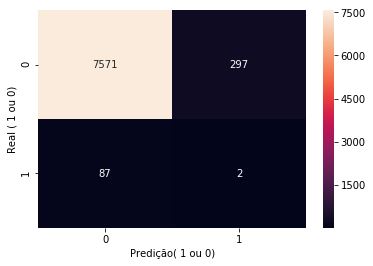

In [51]:
cm=confusion_matrix(Y_teste, dmclf_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression( random_state=42)

In [54]:
lr.fit(X_treino, Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
y_pred = lr.predict(X_teste)

In [56]:
print(classification_report(Y_teste,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      7868
          1       0.21      0.15      0.17        89

avg / total       0.98      0.98      0.98      7957



Text(33,0.5,'Real ( 1 ou 0)')

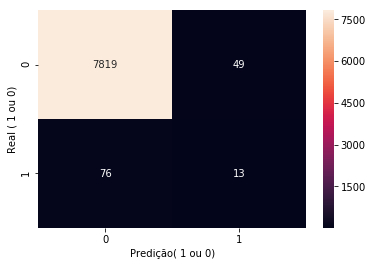

In [57]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf= RandomForestClassifier( random_state=42)

In [60]:
rf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
rf_pred = rf.predict(X_teste)

In [62]:
print(classification_report(Y_teste,rf_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      7868
          1       0.60      0.42      0.49        89

avg / total       0.99      0.99      0.99      7957



Text(33,0.5,'Real ( 1 ou 0)')

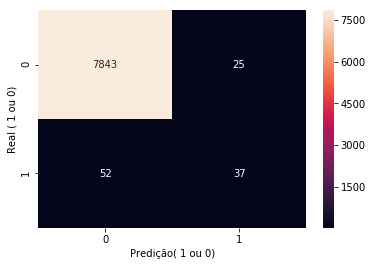

In [63]:
cm=confusion_matrix(Y_teste, rf_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## GradientBoosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb = GradientBoostingClassifier(random_state=42)

In [66]:
gb.fit(X_treino, Y_treino)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [67]:
gb_pred = gb.predict(X_teste)

In [68]:
print(classification_report(Y_teste, gb_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7868
          1       0.45      0.63      0.53        89

avg / total       0.99      0.99      0.99      7957



Text(33,0.5,'Real ( 1 ou 0)')

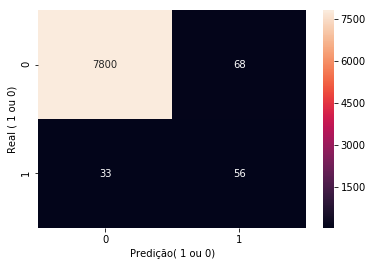

In [69]:
cm = confusion_matrix(Y_teste, gb_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## XGBoost

In [70]:
from xgboost import XGBClassifier

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [71]:
xgb = XGBClassifier(seed=42, n_estimators=300)

In [72]:
xgb.fit(X_treino, Y_treino)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [73]:
xgb_pred = xgb.predict(X_teste)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
print(classification_report(Y_teste,xgb_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7868
          1       0.55      0.80      0.65        89

avg / total       0.99      0.99      0.99      7957



Text(33,0.5,'Real ( 1 ou 0)')

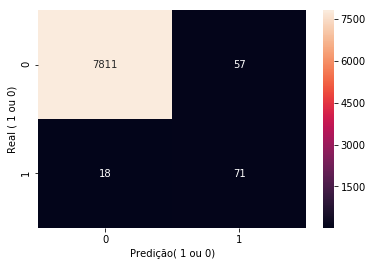

In [75]:
cm=confusion_matrix(Y_teste, xgb_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

clf = XGBClassifier(seed=42, n_estimators=300)

clf.fit(X_treino, Y_treino)
train_acc = clf.score(X_treino, Y_treino)
val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
test_acc = clf.score(X_teste, Y_teste)
print('Treino:', train_acc)
print('Validation score', val_score.mean())
print('Teste:', test_acc)

print('ROC AUC')

y_proba_treino = clf.predict_proba(X_treino)
roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
print('Treino', roc_treino)

y_proba_teste = clf.predict_proba(X_teste)
roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
print('Test', roc_teste)
print('='*80)

Treino: 0.9944776215244333
Validation score 0.9808003002027814
Teste: 0.9905743370617067
ROC AUC


In [ ]:
y_proba = clf.predict_proba(X_teste)
auc = metrics.roc_auc_score(Y_teste, y_proba[:,1])
print(auc)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, xgb_pred)
plt.plot(fpr, tpr)

plt.plot([0,1],[0,1], '--', label='Previsão aleatória')

plt.title('ROC curve')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.grid(True)
plt.show()